# Read Data

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
!pip install -q kaggle

In [236]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"rezaseidgar","key":"87df51df3f17e77c3e0b2e4a2b031614"}'}

In [237]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [238]:
!chmod 600 ~/.kaggle/kaggle.json

In [239]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

apartment-rental-offers-in-germany.zip: Skipping, found more recently modified local copy (use --force to force download)


In [240]:
!ls

 apartment-rental-offers-in-germany.zip  'kaggle (2).json'   sample_data
 immo_data.csv				 'kaggle (3).json'
'kaggle (1).json'			  kaggle.json


In [241]:
!unzip '/content/apartment-rental-offers-in-germany.zip' -d '/content/'

Archive:  /content/apartment-rental-offers-in-germany.zip
replace /content/immo_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [242]:
data = pd.read_csv('/content/immo_data.csv')
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


# Preproccesing

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [244]:
data.isna().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [245]:
mask = ((data.isna().sum()/len(data)) > 0.5)
data.columns[mask]

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [246]:
data = data.drop(columns=data.columns[mask])
data.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street',
       'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description',
       'facilities', 'date'],
      dtype='object')

In [247]:
data.columns.size

42

In [248]:
data = data.drop(columns=['scoutId','heatingType','newlyConst','yearConstructed'
                          ,'firingTypes','yearConstructedRange','houseNumber','street'
                          ,'lift','description','facilities','date'])
data.shape

(268850, 30)

In [249]:
data._get_numeric_data().mean()

serviceCharge           151.206113
balcony                   0.616455
picturecount              9.791958
pricetrend                3.389001
telekomUploadSpeed       28.804928
totalRent               901.331522
hasKitchen                0.342407
cellar                    0.640636
baseRent                694.129432
livingSpace              74.355548
baseRentRange             3.765256
geo_plz               37283.022235
noRooms                   2.641261
thermalChar             114.749533
floor                     2.122405
numberOfFloors            3.572319
noRoomsRange              2.571542
garden                    0.196232
livingSpaceRange          3.070790
dtype: float64

In [250]:
indices = data['totalRent'].isna()
indices = indices[indices].index

In [251]:
data.drop(indices,inplace=True)

In [252]:
data['index'] = list(range(len(data)))
data.set_index(data['index'], inplace = True)
data.drop(columns=['index'],inplace=True)

In [253]:
data.head()

,regio1,serviceCharge,telekomTvOffer,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,hasKitchen,geo_bln,...,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
index,,,,,,,,,,,,,,,,,,,,,
0,Nordrhein_Westfalen,245.0,ONE_YEAR_FREE,False,6,4.62,10.0,840.00,False,Nordrhein_Westfalen,...,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren
1,Sachsen,255.0,ONE_YEAR_FREE,True,8,2.72,2.4,1300.00,False,Sachsen,...,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt
2,Bremen,138.0,NaN,True,19,2.46,NaN,903.00,False,Bremen,...,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen
3,Sachsen,70.0,ONE_YEAR_FREE,False,9,1.01,2.4,380.00,False,Sachsen,...,9599,2.0,NaN,1.0,4.0,2,True,3,Mittelsachsen_Kreis,Freiberg
4,Bremen,88.0,ONE_YEAR_FREE,True,5,1.89,2.4,584.25,False,Bremen,...,28717,3.0,63.0,NaN,NaN,3,False,2,Bremen,St._Magnus


In [254]:
data.isna().sum()

regio1                    0
serviceCharge          4090
telekomTvOffer        27429
balcony                   0
picturecount              0
pricetrend             1609
telekomUploadSpeed    28050
totalRent                 0
hasKitchen                0
geo_bln                   0
cellar                    0
baseRent                  0
livingSpace               0
geo_krs                   0
condition             56980
interiorQual          88907
petsAllowed           95352
streetPlain           54067
baseRentRange             0
typeOfFlat            30556
geo_plz                   0
noRooms                   0
thermalChar           93733
floor                 40370
numberOfFloors        79349
noRoomsRange              0
garden                    0
livingSpaceRange          0
regio2                    0
regio3                    0
dtype: int64

In [255]:
data.fillna(data._get_numeric_data().mean(),inplace=True)

In [256]:
data.isna().sum()

regio1                    0
serviceCharge             0
telekomTvOffer        27429
balcony                   0
picturecount              0
pricetrend                0
telekomUploadSpeed        0
totalRent                 0
hasKitchen                0
geo_bln                   0
cellar                    0
baseRent                  0
livingSpace               0
geo_krs                   0
condition             56980
interiorQual          88907
petsAllowed           95352
streetPlain           54067
baseRentRange             0
typeOfFlat            30556
geo_plz                   0
noRooms                   0
thermalChar               0
floor                     0
numberOfFloors            0
noRoomsRange              0
garden                    0
livingSpaceRange          0
regio2                    0
regio3                    0
dtype: int64

In [257]:
for col in data.columns :
  if data[col].dtype == 'int64' or data[col].dtype == 'float64':
    up = data[col].mean() + 3*data[col].std()
    low = data[col].mean() - 3*data[col].std()
    mask = (data[col] > up ) | (data[col] < low )
    data = data.drop(data[mask].index)

In [258]:
y = data['totalRent']

In [259]:
y.head()

index
0     840.00
1    1300.00
2     903.00
3     380.00
4     584.25
Name: totalRent, dtype: float64

In [260]:
data.head()

,regio1,serviceCharge,telekomTvOffer,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,hasKitchen,geo_bln,...,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
index,,,,,,,,,,,,,,,,,,,,,
0,Nordrhein_Westfalen,245.0,ONE_YEAR_FREE,False,6,4.62,10.000000,840.00,False,Nordrhein_Westfalen,...,44269,4.0,181.400000,1.000000,3.000000,4,True,4,Dortmund,Schüren
1,Sachsen,255.0,ONE_YEAR_FREE,True,8,2.72,2.400000,1300.00,False,Sachsen,...,1097,3.0,113.937084,3.000000,4.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt
2,Bremen,138.0,NaN,True,19,2.46,28.928361,903.00,False,Bremen,...,28213,3.0,188.900000,1.000000,3.581492,3,False,4,Bremen,Neu_Schwachhausen
3,Sachsen,70.0,ONE_YEAR_FREE,False,9,1.01,2.400000,380.00,False,Sachsen,...,9599,2.0,113.937084,1.000000,4.000000,2,True,3,Mittelsachsen_Kreis,Freiberg
4,Bremen,88.0,ONE_YEAR_FREE,True,5,1.89,2.400000,584.25,False,Bremen,...,28717,3.0,63.000000,2.131888,3.581492,3,False,2,Bremen,St._Magnus


In [261]:
print(data.shape)
print(y.shape)

(213825, 30)
(213825,)


In [262]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    data[col] = data[col].fillna(data[col].value_counts().head(1).index[0])

In [263]:
data.isna().sum()

regio1                0
serviceCharge         0
telekomTvOffer        0
balcony               0
picturecount          0
pricetrend            0
telekomUploadSpeed    0
totalRent             0
hasKitchen            0
geo_bln               0
cellar                0
baseRent              0
livingSpace           0
geo_krs               0
condition             0
interiorQual          0
petsAllowed           0
streetPlain           0
baseRentRange         0
typeOfFlat            0
geo_plz               0
noRooms               0
thermalChar           0
floor                 0
numberOfFloors        0
noRoomsRange          0
garden                0
livingSpaceRange      0
regio2                0
regio3                0
dtype: int64

In [264]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    print(col)
    print(data[col].value_counts())
    print('_______________________________')

regio1
Sachsen                   50624
Nordrhein_Westfalen       47980
Sachsen_Anhalt            17355
Bayern                    16520
Hessen                    13176
Baden_Württemberg         12283
Niedersachsen             11644
Thüringen                  7165
Berlin                     6889
Rheinland_Pfalz            6217
Brandenburg                6179
Mecklenburg_Vorpommern     5824
Schleswig_Holstein         5599
Hamburg                    2981
Bremen                     2421
Saarland                    968
Name: regio1, dtype: int64
_______________________________
telekomTvOffer
ONE_YEAR_FREE    206972
NONE               3962
ON_DEMAND          2891
Name: telekomTvOffer, dtype: int64
_______________________________
balcony
True     130528
False     83297
Name: balcony, dtype: int64
_______________________________
hasKitchen
False    141620
True      72205
Name: hasKitchen, dtype: int64
_______________________________
geo_bln
Sachsen                   50624
Nordrhein_Westfalen   

In [265]:
data['telekomTvOffer'].value_counts()

ONE_YEAR_FREE    206972
NONE               3962
ON_DEMAND          2891
Name: telekomTvOffer, dtype: int64

In [266]:
others = list(data['telekomTvOffer'].value_counts().tail(2).index)
def edit_telekomTvOffer(a):
  if a in others:
    return 'others'
  return a
data['telekomTvOffer'] = data['telekomTvOffer'].apply(edit_telekomTvOffer)
data['telekomTvOffer'].value_counts()

ONE_YEAR_FREE    206972
others             6853
Name: telekomTvOffer, dtype: int64

In [267]:
print(data['condition'].value_counts())

well_kept                             106730
refurbished                            23452
fully_renovated                        21207
mint_condition                         16789
first_time_use                         16357
modernized                             13994
first_time_use_after_refurbishment     12478
negotiable                              1742
need_of_renovation                      1072
ripe_for_demolition                        4
Name: condition, dtype: int64


In [268]:
others = list(data['condition'].value_counts().tail(3).index)
def edit_condition(a):
  if a in others:
    return 'others'
  return a
data['condition'] = data['condition'].apply(edit_condition)
data['condition'].value_counts()

well_kept                             106730
refurbished                            23452
fully_renovated                        21207
mint_condition                         16789
first_time_use                         16357
modernized                             13994
first_time_use_after_refurbishment     12478
others                                  2818
Name: condition, dtype: int64

In [269]:
print(data['interiorQual'].value_counts())

normal           155850
sophisticated     51837
luxury             4571
simple             1567
Name: interiorQual, dtype: int64


In [270]:
others = list(data['interiorQual'].value_counts().tail(2).index)
def edit_interiorQual(a):
  if a in others:
    return 'others'
  return a
data['interiorQual'] = data['interiorQual'].apply(edit_interiorQual)
data['interiorQual'].value_counts()

normal           155850
sophisticated     51837
others             6138
Name: interiorQual, dtype: int64

In [271]:
data['geo_krs'].unique().size

419

In [272]:
others = list(data['geo_krs'].value_counts().tail(400).index)
def edit_geo_krs(a):
  if a in others:
    return 'others'
  return a
data['geo_krs'] = data['geo_krs'].apply(edit_geo_krs)
data['geo_krs'].value_counts()

others                  135584
Leipzig                  11987
Chemnitz                 11183
Berlin                    6889
Dresden                   6115
Magdeburg                 4422
Halle_Saale               3848
Essen                     3397
Frankfurt_am_Main         3042
Hamburg                   2981
München                   2867
Düsseldorf                2853
Duisburg                  2773
Mittelsachsen_Kreis       2487
Dortmund                  2467
Gelsenkirchen             2386
Recklinghausen_Kreis      2162
Zwickau                   2154
Zwickau_Kreis             2153
Köln                      2075
Name: geo_krs, dtype: int64

In [273]:
print(data['regio3'].unique().size)
print(data['regio2'].unique().size)
print(data['streetPlain'].unique().size)

8209
419
47804


In [274]:
data = data.drop(columns=['regio2','regio3','streetPlain'])
data.shape

(213825, 27)

# data visualization

In [275]:
data.head()

,regio1,serviceCharge,telekomTvOffer,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,hasKitchen,geo_bln,...,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange
index,,,,,,,,,,,,,,,,,,,,,
0,Nordrhein_Westfalen,245.0,ONE_YEAR_FREE,False,6,4.62,10.000000,840.00,False,Nordrhein_Westfalen,...,4,ground_floor,44269,4.0,181.400000,1.000000,3.000000,4,True,4
1,Sachsen,255.0,ONE_YEAR_FREE,True,8,2.72,2.400000,1300.00,False,Sachsen,...,6,apartment,1097,3.0,113.937084,3.000000,4.000000,3,False,4
2,Bremen,138.0,ONE_YEAR_FREE,True,19,2.46,28.928361,903.00,False,Bremen,...,5,apartment,28213,3.0,188.900000,1.000000,3.581492,3,False,4
3,Sachsen,70.0,ONE_YEAR_FREE,False,9,1.01,2.400000,380.00,False,Sachsen,...,2,apartment,9599,2.0,113.937084,1.000000,4.000000,2,True,3
4,Bremen,88.0,ONE_YEAR_FREE,True,5,1.89,2.400000,584.25,False,Bremen,...,3,ground_floor,28717,3.0,63.000000,2.131888,3.581492,3,False,2


In [276]:
data.columns

Index(['regio1', 'serviceCharge', 'telekomTvOffer', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'hasKitchen',
       'geo_bln', 'cellar', 'baseRent', 'livingSpace', 'geo_krs', 'condition',
       'interiorQual', 'petsAllowed', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange'],
      dtype='object')

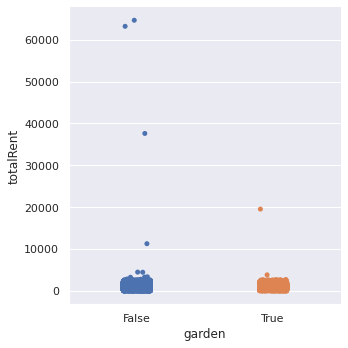

In [277]:
sns.set(rc={'figure.figsize':(20,10)})
sns.catplot(x="garden", y="totalRent", data=data)

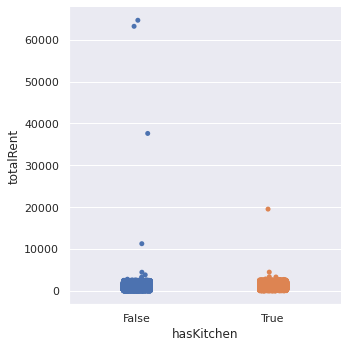

In [278]:
sns.catplot(x="hasKitchen", y="totalRent", data=data)

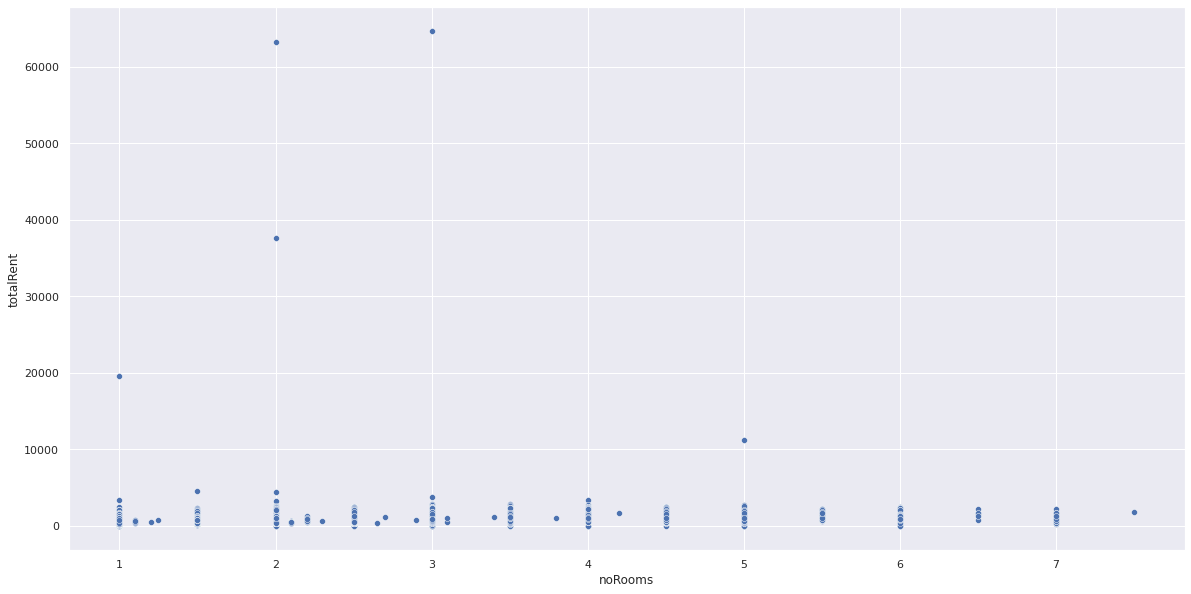

In [279]:
# sns.catplot(x="noRooms", y="livingSpace", data=data)
sns.scatterplot(data=data, x="noRooms", y="totalRent")

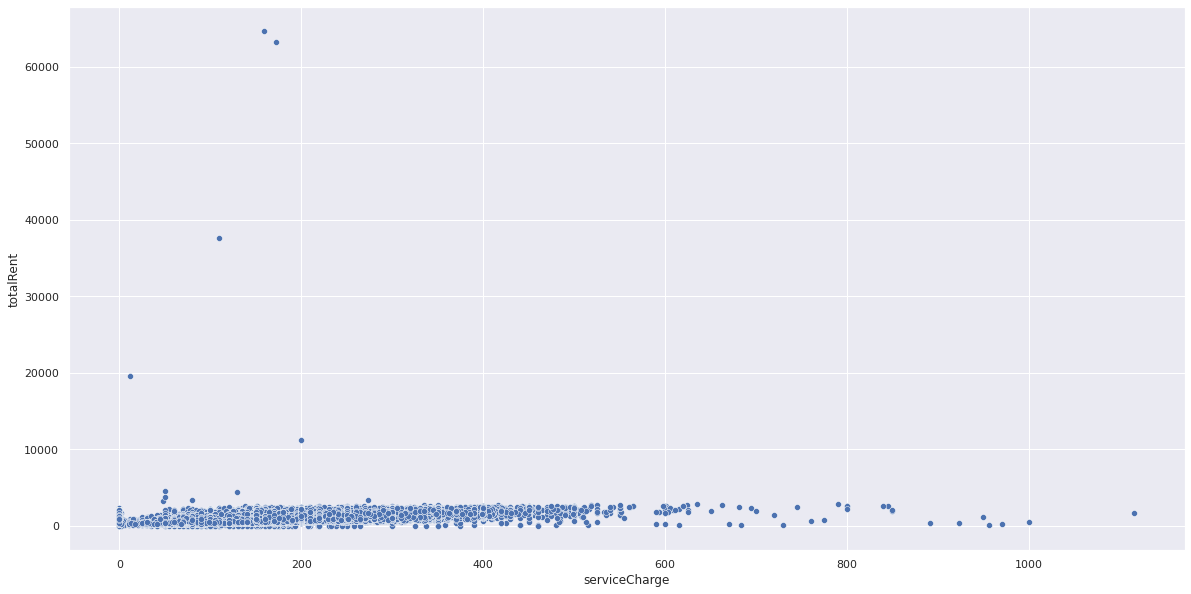

In [280]:
sns.scatterplot(data=data, x="serviceCharge", y="totalRent")

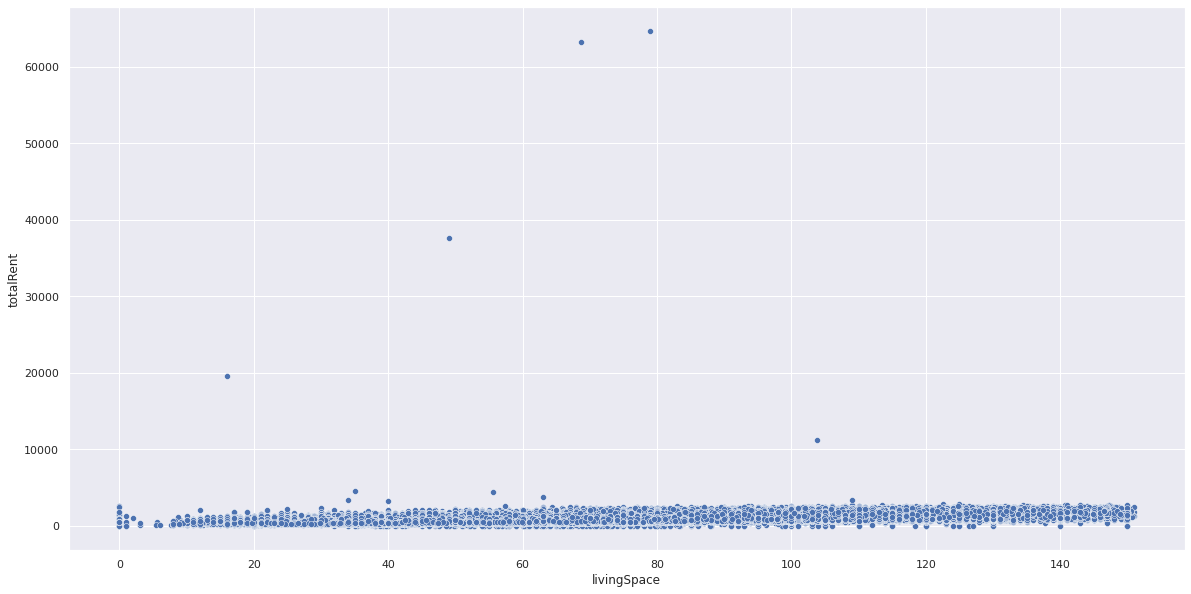

In [281]:
sns.scatterplot(data=data, x="livingSpace", y="totalRent")

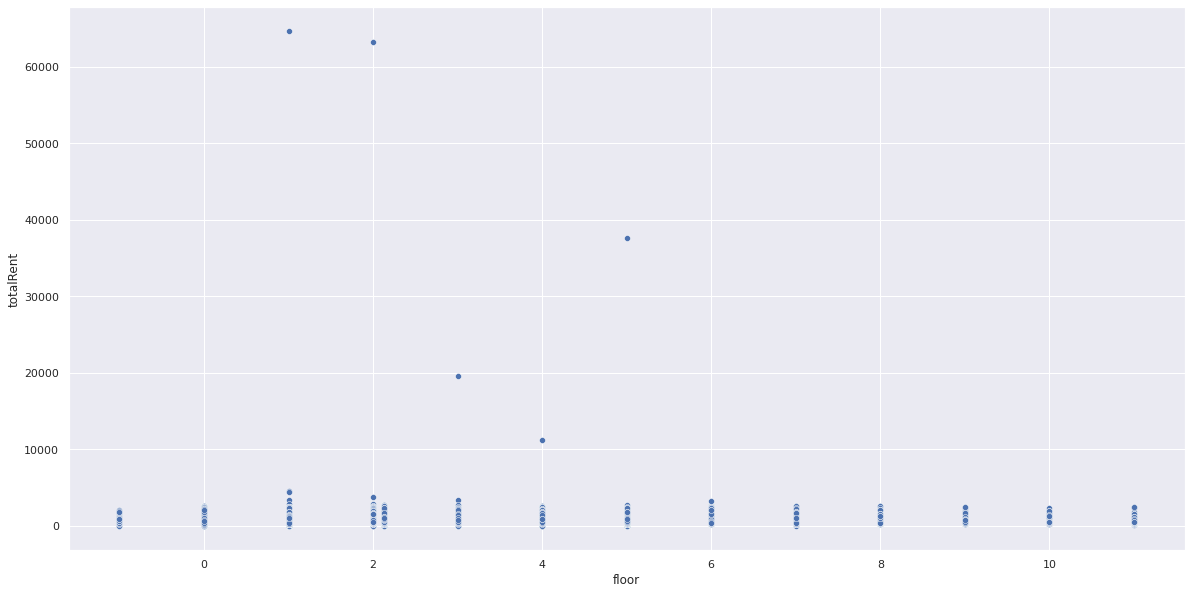

In [282]:

sns.scatterplot(x="floor", y="totalRent", data=data)

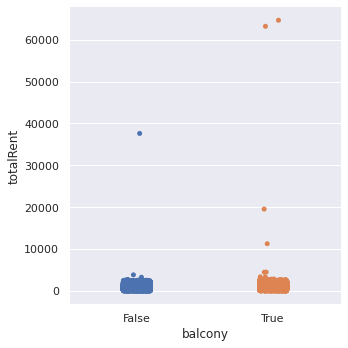

In [283]:
sns.catplot(x="balcony", y="totalRent", data=data)

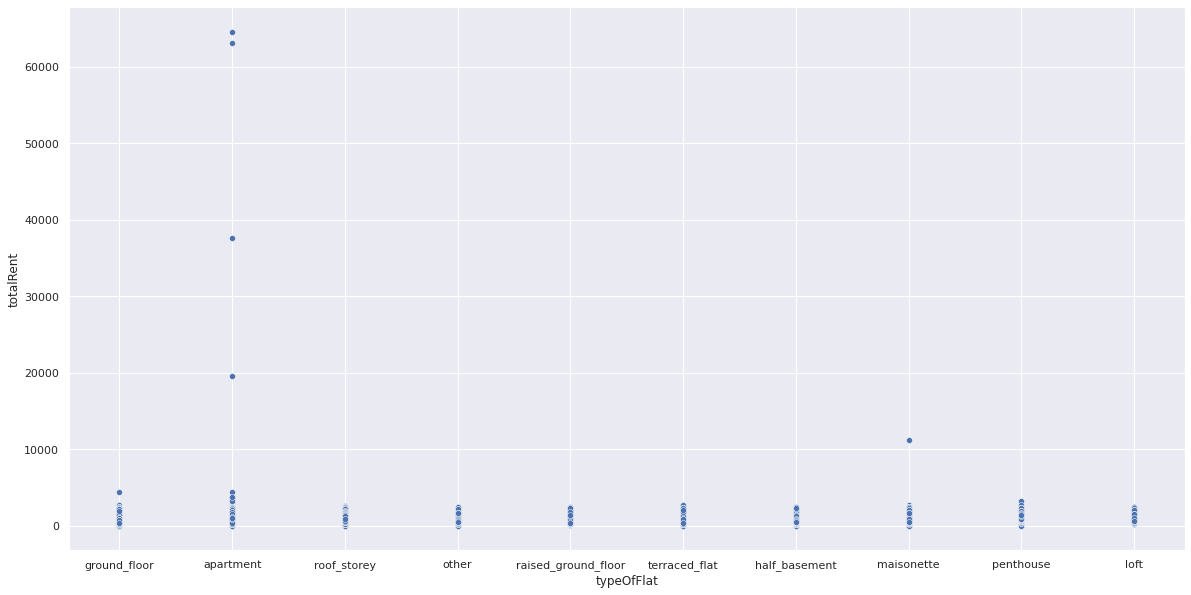

In [284]:
sns.scatterplot(x="typeOfFlat", y="totalRent", data=data)

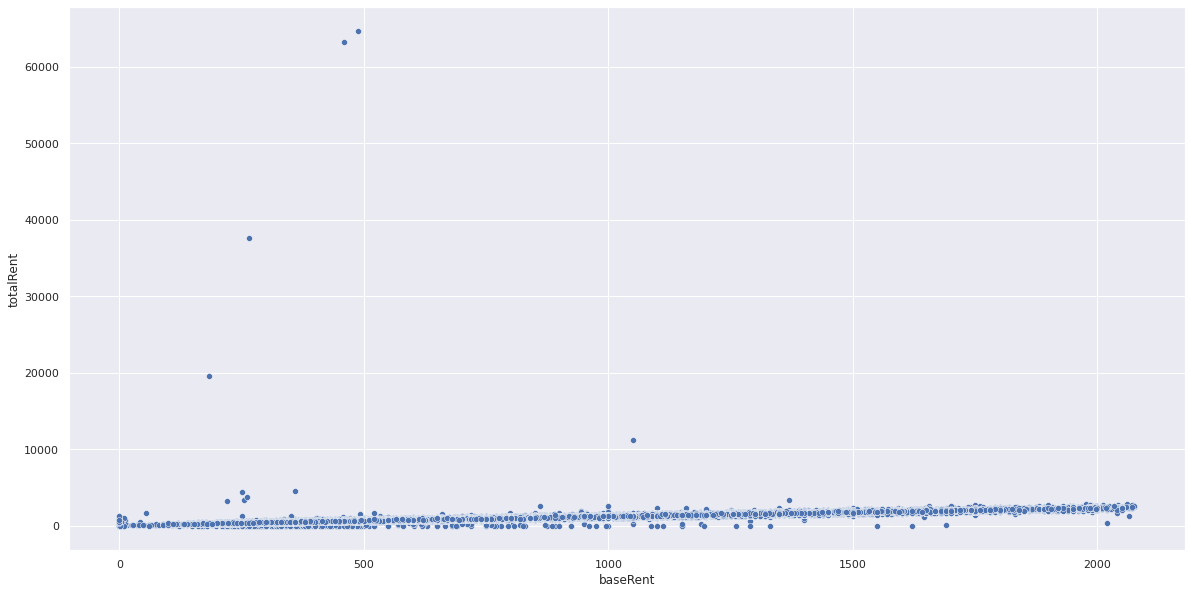

In [285]:
sns.scatterplot(x="baseRent", y="totalRent", data=data)

In [286]:
cor_matrix = data.corr()

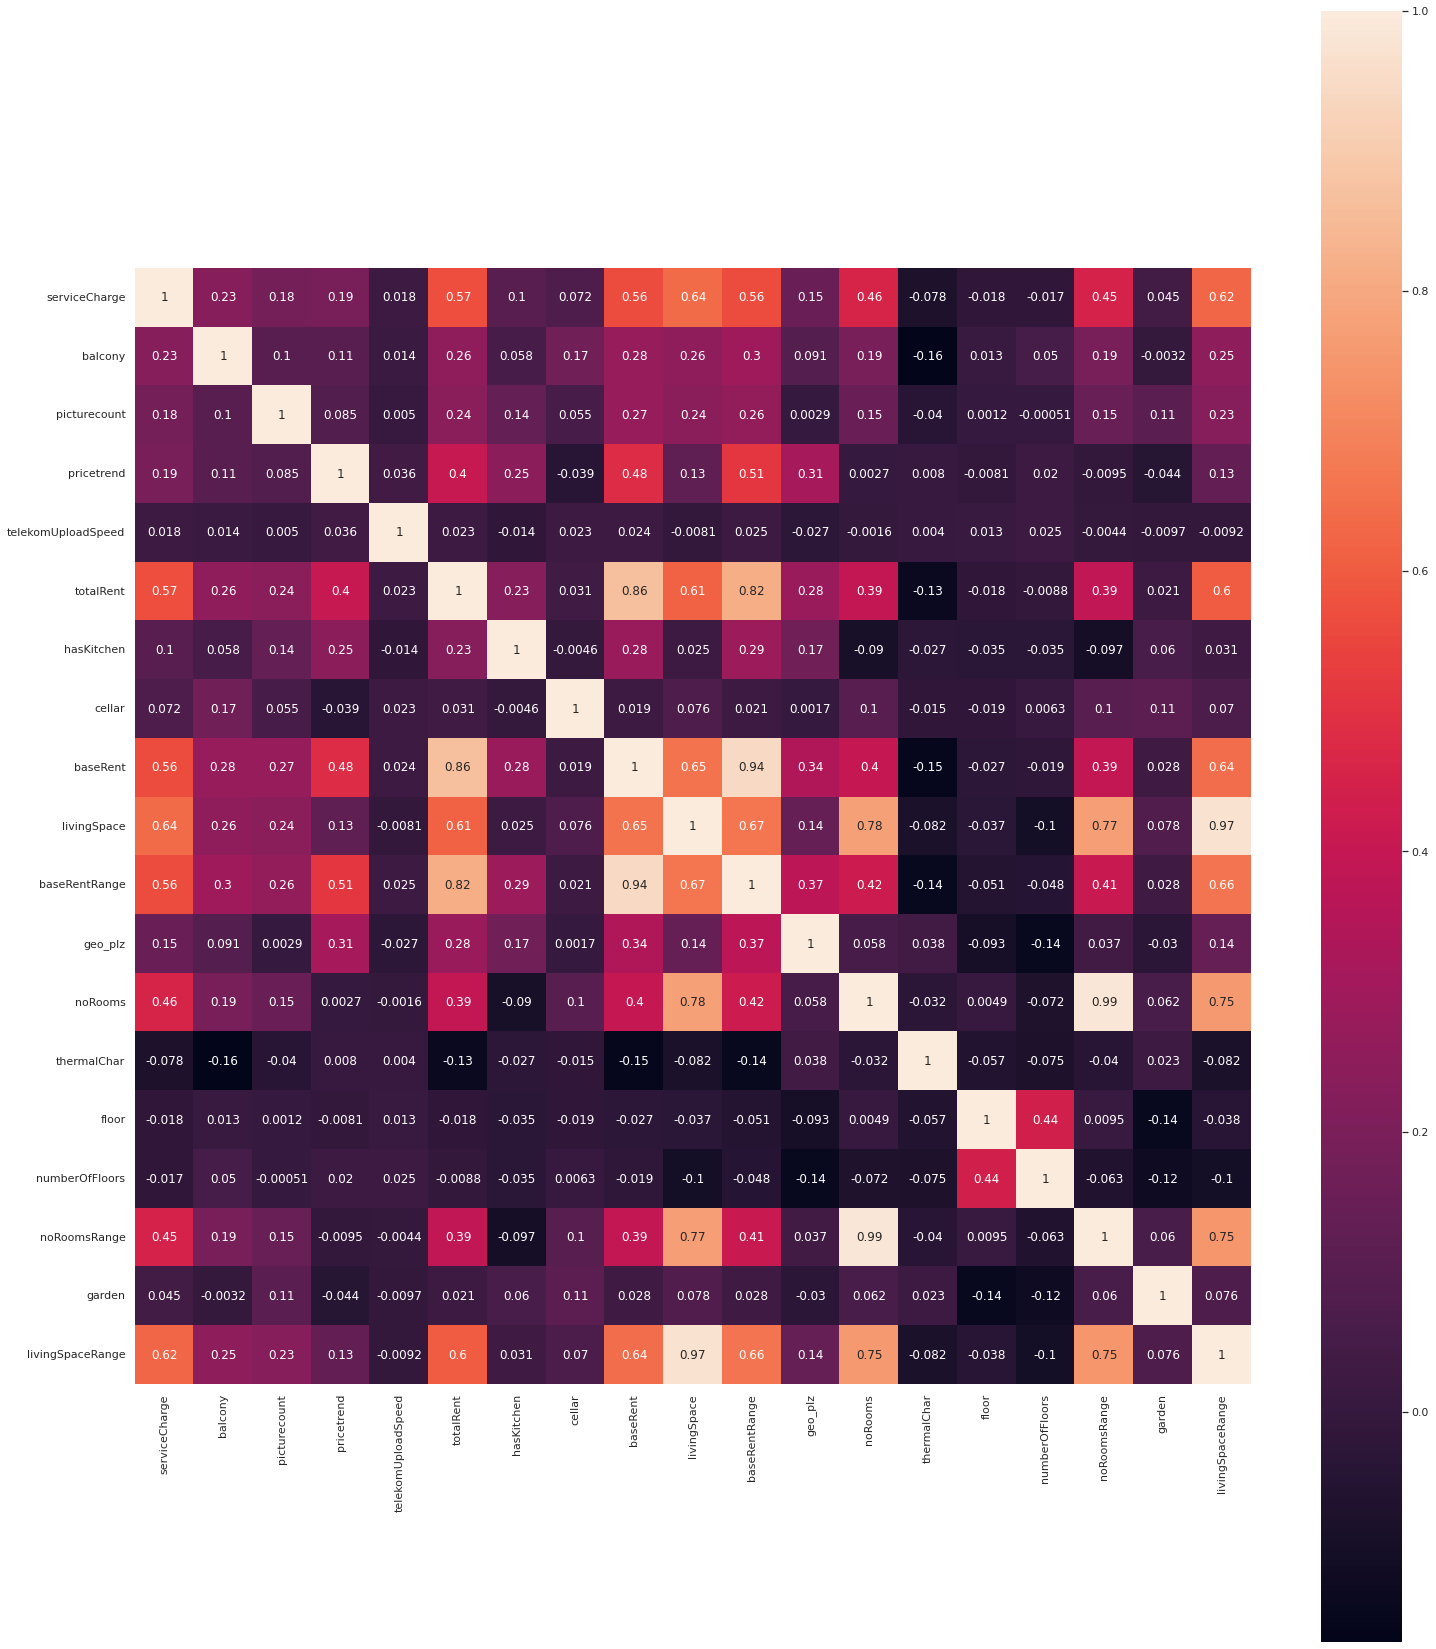

In [287]:
f , ax = plt.subplots(figsize=(25,30))
sns.heatmap(cor_matrix,square=True,annot=True)

# Prediction

In [288]:
cate_features = []

for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    cate_features.append(col)

cate_features

['regio1',
 'telekomTvOffer',
 'balcony',
 'hasKitchen',
 'geo_bln',
 'cellar',
 'geo_krs',
 'condition',
 'interiorQual',
 'petsAllowed',
 'typeOfFlat',
 'garden']

In [289]:
dum_features = pd.get_dummies(data[cate_features])
dum_features.head()

,balcony,hasKitchen,cellar,garden,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
index,,,,,,,,,,,,,,,,,,,,,
0,False,False,True,True,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,True,False,True,False,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,True,False,False,False,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,False,False,True,True,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,True,False,True,False,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [290]:
data = pd.concat([data,dum_features],axis=1)
data.head()

,regio1,serviceCharge,telekomTvOffer,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,hasKitchen,geo_bln,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
index,,,,,,,,,,,,,,,,,,,,,
0,Nordrhein_Westfalen,245.0,ONE_YEAR_FREE,False,6,4.62,10.000000,840.00,False,Nordrhein_Westfalen,...,0,1,0,0,0,0,0,0,0,0
1,Sachsen,255.0,ONE_YEAR_FREE,True,8,2.72,2.400000,1300.00,False,Sachsen,...,1,0,0,0,0,0,0,0,0,0
2,Bremen,138.0,ONE_YEAR_FREE,True,19,2.46,28.928361,903.00,False,Bremen,...,1,0,0,0,0,0,0,0,0,0
3,Sachsen,70.0,ONE_YEAR_FREE,False,9,1.01,2.400000,380.00,False,Sachsen,...,1,0,0,0,0,0,0,0,0,0
4,Bremen,88.0,ONE_YEAR_FREE,True,5,1.89,2.400000,584.25,False,Bremen,...,0,1,0,0,0,0,0,0,0,0


In [291]:
data = data.drop(columns=cate_features)
data.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
index,,,,,,,,,,,,,,,,,,,,,
0,245.0,6,4.62,10.000000,840.00,595.00,86.00,4,44269,4.0,...,0,1,0,0,0,0,0,0,0,0
1,255.0,8,2.72,2.400000,1300.00,965.00,83.80,6,1097,3.0,...,1,0,0,0,0,0,0,0,0,0
2,138.0,19,2.46,28.928361,903.00,765.00,84.97,5,28213,3.0,...,1,0,0,0,0,0,0,0,0,0
3,70.0,9,1.01,2.400000,380.00,310.00,62.00,2,9599,2.0,...,1,0,0,0,0,0,0,0,0,0
4,88.0,5,1.89,2.400000,584.25,452.25,60.30,3,28717,3.0,...,0,1,0,0,0,0,0,0,0,0


In [292]:
data.shape

(213825, 93)

In [293]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [294]:
X = data.drop(columns=['totalRent'])
print(X.shape)
print(y.shape)

(213825, 92)
(213825,)


In [295]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
from sklearn.preprocessing import MinMaxScaler
columns = X_train.columns
scalerx = MinMaxScaler()
X_train_scaled = scalerx.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = columns)

X_test_scaled = scalerx.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = columns)


In [297]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_scaled, y_train)

In [298]:
model.score(X_train_scaled,y_train)

0.7514388706101413

In [299]:
model.score(X_test_scaled,y_test)

0.7815948039832966